<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/One_Hot_Encoding_for_Multiclass_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**One Hot Encoding for Multiclass Logistic Regression Using Sklearn**

Multiclass Logistic Regression:
When outcome has more than to categories, Multi class regression is used for classification. We are going to use One Vs Rest (OVR) algorithm also known as one vs all algorithm. As name suggest in this algorithm we choose one class and put all other classes into second virtual class and run the binary logistic regression on it. We repeat this procedure for all the classes in the dataset. So we actually end up with binary classifiers designed to recognize each class in dataset.
For prediction on given data, our algorithm returns probabilities for each class in the dataset and whichever class has the highest probability is our prediction

One Hot Encoding:
One of the most important thing while working on applied machine learning is well formatted data. We all know that how messy real world data can be. That is the reason why most of the time is spent on data preprocessing. Most of the machine learning models cannot operate if data is not in numeric format. That’s where One Hot Encoding come in picture. In short, it is a technique used to convert categorical text data into numeric format.

**Importing libraries and dataset**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
df = pd.read_csv('proteinase_bioactivity_data_3class_pIC50.csv')

**Convert Categorical Data To Numeric Data**

Label Encoding, also knows as ‘Integer Encoding’ is a technique that simply assign numbers to each category. Numbering starts from 1 and then increase it for each category. In this case we have an array [0,1,2] for the class features (active, incative, intermediate) 

In [2]:
le = preprocessing.LabelEncoder()
le.fit(['active', 'inactive', 'intermediate'])
le.classes_
le.transform(['active', 'inactive', 'intermediate'])

array([0, 1, 2])

In [3]:
df.head(5)

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


In [4]:
print('Digits dataset structure= ', dir(df))
print('Data shape= ', df.shape)

Digits dataset structure=  ['LogP', 'MW', 'NumHAcceptors', 'NumHDonors', 'T', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '_

**Data Visualization**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          133 non-null    int64  
 1   molecule_chembl_id  133 non-null    object 
 2   canonical_smiles    133 non-null    object 
 3   class               133 non-null    object 
 4   MW                  133 non-null    float64
 5   LogP                133 non-null    float64
 6   NumHDonors          133 non-null    float64
 7   NumHAcceptors       133 non-null    float64
 8   pIC50               133 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 9.5+ KB


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

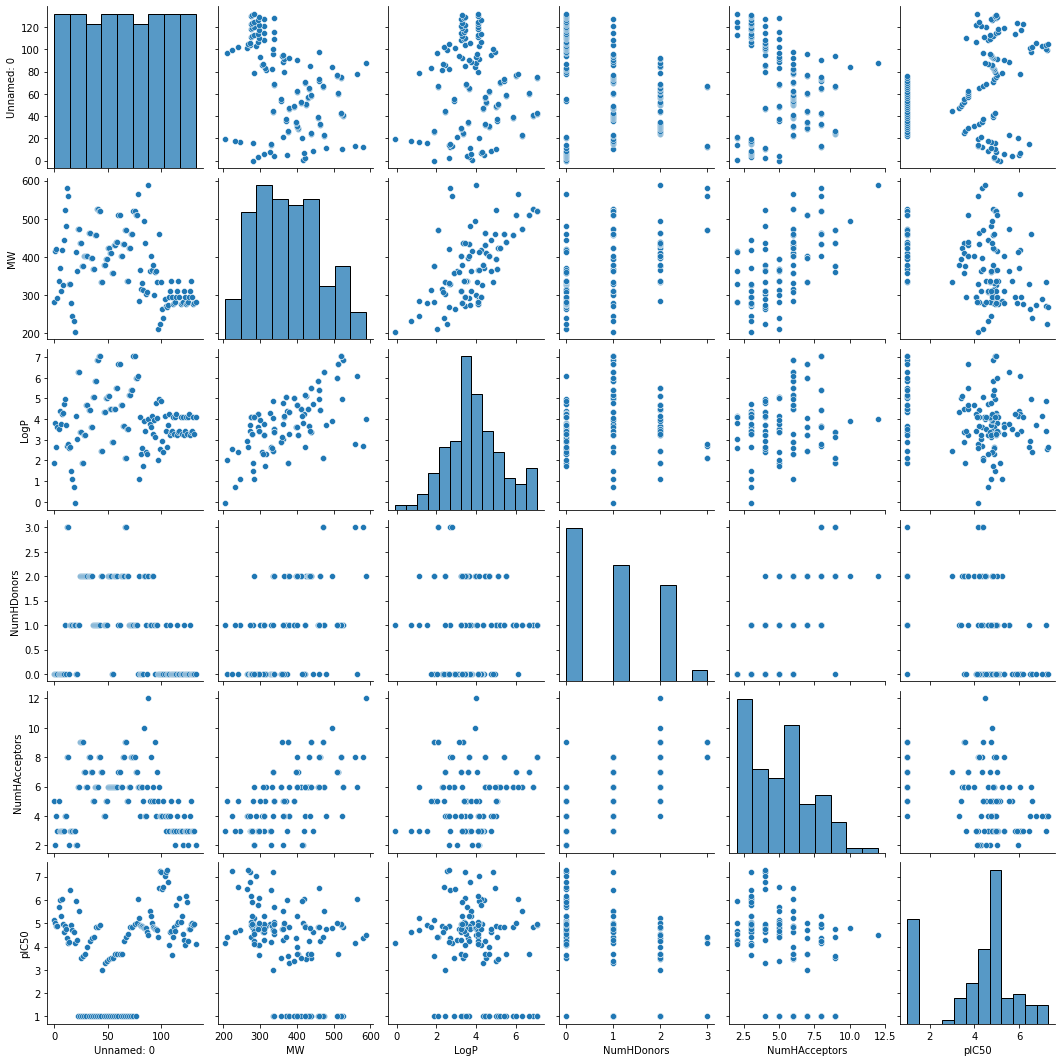

In [7]:
sns.pairplot(df)

**Build Machine Learning Model**

We create Feature Matrix X and Label Vector y to predict the molecular class related to molecular features.

In [8]:
df.columns

Index(['Unnamed: 0', 'molecule_chembl_id', 'canonical_smiles', 'class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

In [9]:
X = df[['MW','LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']]

In [10]:
y = df['class']

**Create Test And Train Dataset**

We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
We will keep 20% of data for testing and 80% of data for training the model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

Checking class data are finally in numeric format [0,1,2] for the three molecular classes.

In [12]:
y_test = le.fit_transform(y_test)
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0])

In [13]:
y_train = le.fit_transform(y_train)
y_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1])

**Testing The Model**

In [14]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (66, 5)
X_test dimension=  (67, 5)
y_train dimension=  (66,)
y_train dimension=  (67,)


**Multi class Logistic Regression Using OVR**

Since we are going to use One Vs Rest algorithm, set > multi_class=’ovr’
Since we are using One Vs Rest algorithm we must use ‘liblinear’ solver with it.

In [15]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
clf1 = LogisticRegression()

In [17]:
probas1_ = clf1.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Calculating ROC AUC scores and plotting them for the three classes.**

In [34]:
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1], pos_label=0)
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas1_[:, 1], pos_label=1)
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, probas1_[:, 1], pos_label=2)
roc_auc_model3 = auc(fp3, tp3)
print("AUC for Logistic Regression Model for active molecules: ",roc_auc_model1)
print("AUC for Logistic Regression Model for inactive molecules: ",roc_auc_model2)
print("AUC for Logistic Regression Model for intermediate moleculs: ",roc_auc_model3)

AUC for Logistic Regression Model for active molecules:  0.15846994535519124
AUC for Logistic Regression Model for inactive molecules:  0.8099730458221025
AUC for Logistic Regression Model for intermediate moleculs:  0.27754237288135586


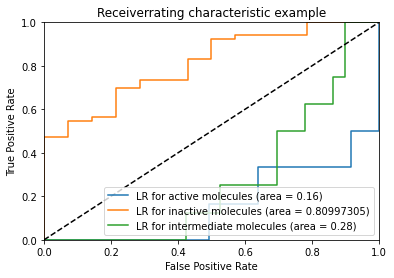

In [36]:
plt.clf()
plt.plot(fp1, tp1, label='LR for active molecules (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='LR for inactive molecules (area = %0.8f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='LR for intermediate molecules (area = %0.2f)' % roc_auc_model3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Model Score**

Check the model score using both test and train data

In [37]:
lm.score(X_test, y_test)

0.7910447761194029

In [49]:
lm.score(X_train, y_train)

0.8787878787878788

**Classification Report**

Classification report is used to measure the quality of prediction from classification algorithm

Precision: Indicates how many classes are correctly classified

Recall: Indicates what proportions of actual positives was identified correctly

F-Score: It is the harmonic mean between precision & recall

Support: It is the number of occurrence of the given class in our dataset

In [46]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.85      0.94      0.89        53
           2       0.00      0.00      0.00         8

    accuracy                           0.79        67
   macro avg       0.48      0.48      0.48        67
weighted avg       0.72      0.79      0.76        67



In [47]:
print(metrics.classification_report(y_train, lm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.98      0.93        51
           2       0.00      0.00      0.00         6

    accuracy                           0.88        66
   macro avg       0.59      0.62      0.61        66
weighted avg       0.81      0.88      0.84        66

